# Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

## init

In [134]:
%run init.ipynb

# Seaborn Data

built-in data

In [135]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# Relational Plots

### relplot

Figure-level interface for drawing relational plots onto a FacetGrid.

relplot plots include scatter and line

In [136]:
# data
cars = db.tables.vega_cars.to_pandas()
cars['Year'] = cars['Year'].dt.year
cars.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.00,4,140.00,86.00,2790,15.60,1982,USA
402,vw pickup,44.00,4,97.00,52.00,2130,24.60,1982,Europe
403,dodge rampage,32.00,4,135.00,84.00,2295,11.60,1982,USA
404,ford ranger,28.00,4,120.00,79.00,2625,18.60,1982,USA
405,chevy s-10,31.00,4,119.00,82.00,2720,19.40,1982,USA


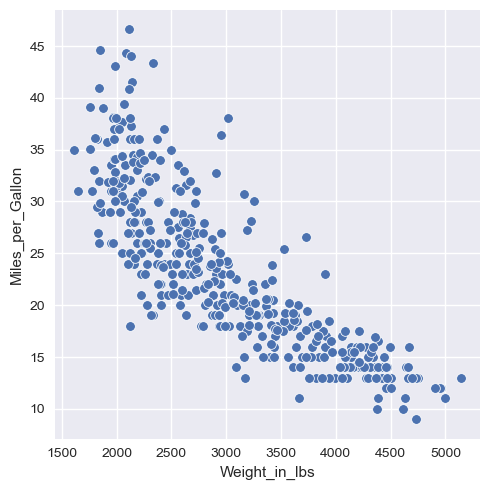

In [137]:
# basic relplot (scatter plot)
# relplot kind can be line
sns.relplot(x='Weight_in_lbs', y='Miles_per_Gallon', data=cars, kind='scatter');

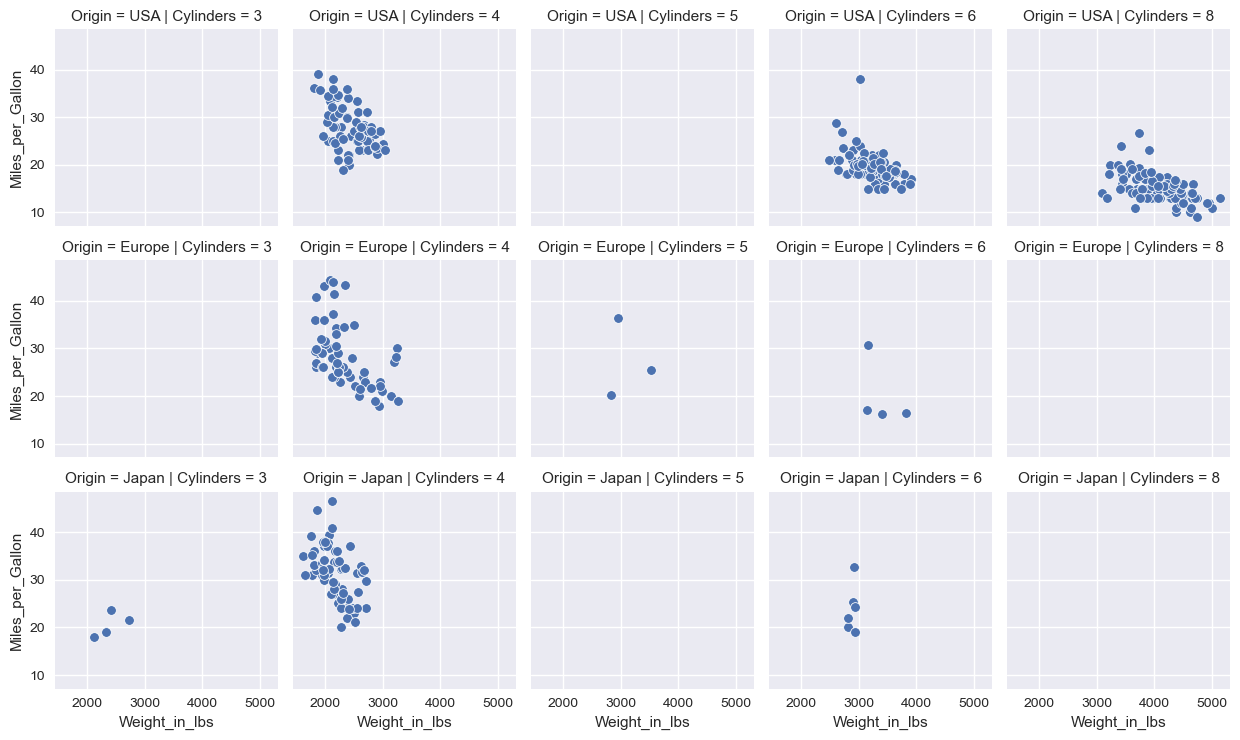

In [138]:
# add col and/or row arguments to split data in different ways and add detail
# col / row helps visualize data in different ways
sns.relplot(x='Weight_in_lbs', 
            y='Miles_per_Gallon', 
            col='Cylinders',
            row='Origin',
            height=2.5,
            data=cars);

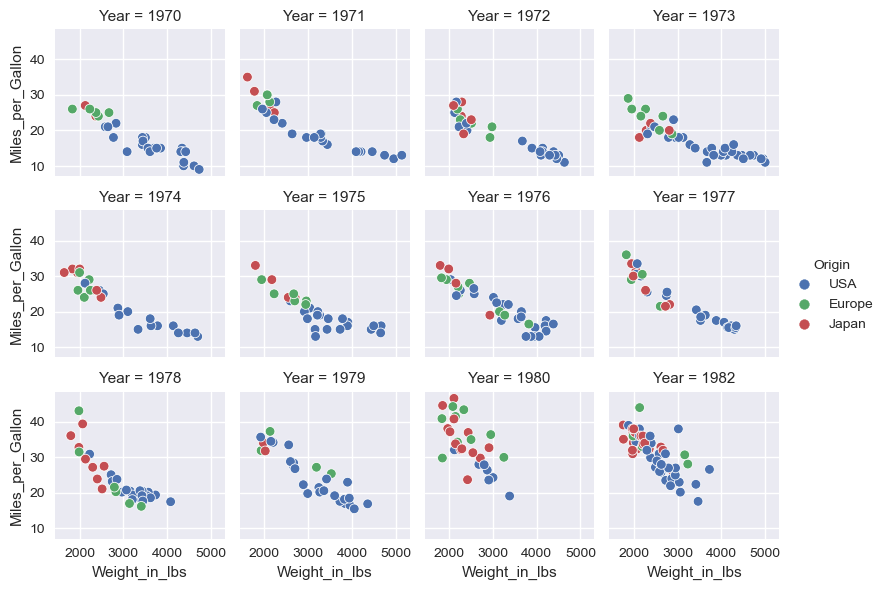

In [139]:
# show Years using column wrap and Origin using hue color
sns.relplot(x='Weight_in_lbs', 
            y='Miles_per_Gallon', 
            hue='Origin', 
            col='Year', 
            col_wrap=4,
            height=2,
            data=cars);

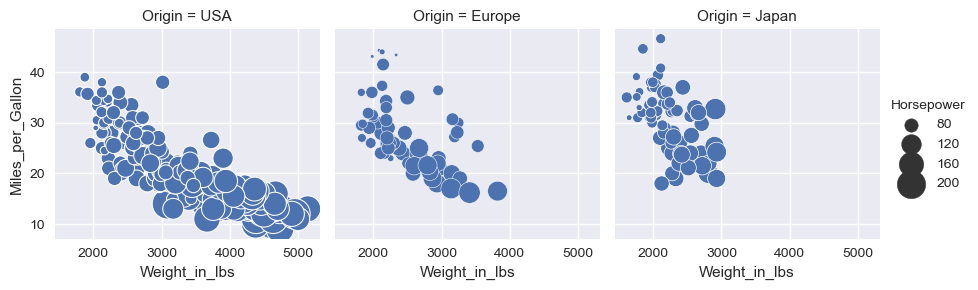

In [140]:
# plot using size (see legend for size scale)
# use sizes to adjust size of bubbles
sns.relplot(x='Weight_in_lbs', 
            y='Miles_per_Gallon', 
            col='Origin',
            size='Horsepower',
            sizes=(1,500),
            height=3,
            data=cars);

In [141]:
# data
gapminder = db.tables.vega_gapminer.to_pandas()
gapminder.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.33,7.70
1,1960,Afghanistan,0,9829450,32.00,7.70
2,1965,Afghanistan,0,10997885,34.02,7.70
3,1970,Afghanistan,0,12430623,36.09,7.70
4,1975,Afghanistan,0,14132019,38.44,7.70


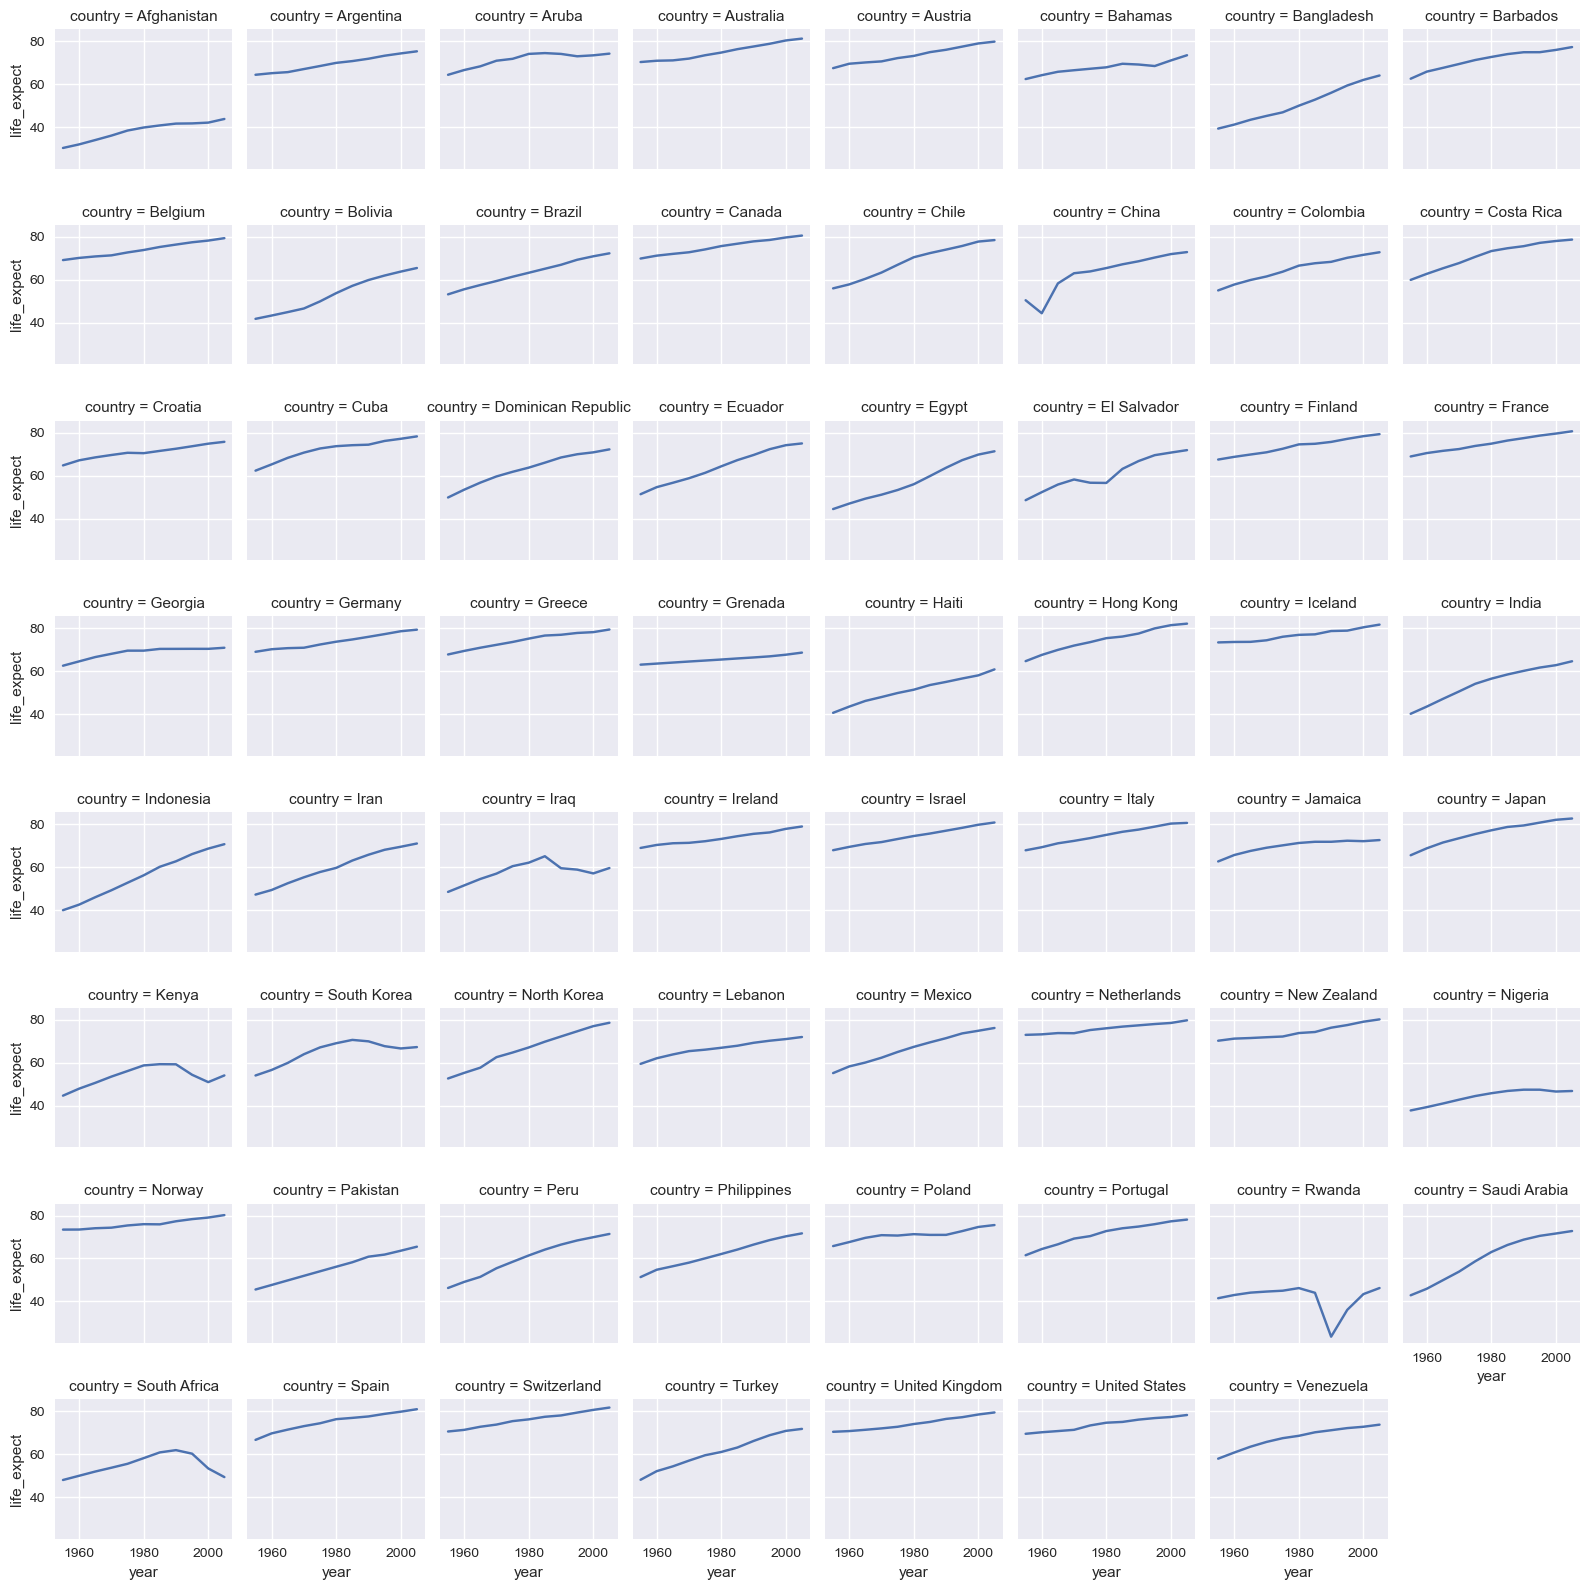

In [142]:
# show plot using kind of line
sns.relplot(x='year', 
            y='life_expect', 
            kind='line',
            col='country',
            col_wrap=8,
            height=2,
            data=gapminder);

### scatterplot

Draw a scatter plot with possibility of several semantic groupings.

In [143]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


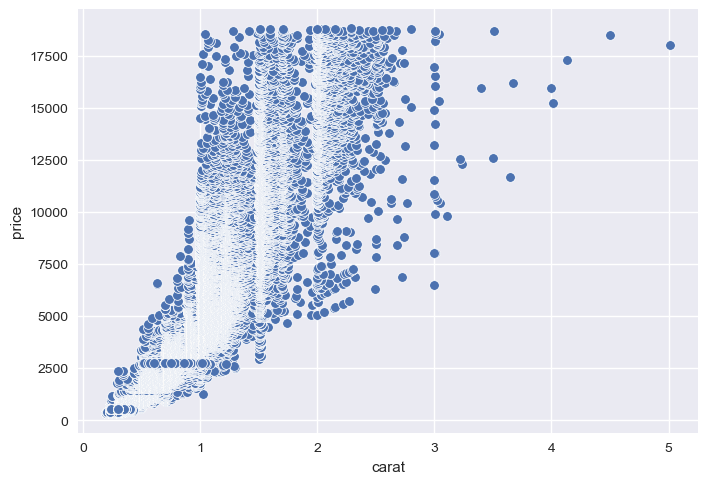

In [144]:
sns.scatterplot(x='carat', y='price', data=diamonds);

In [145]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


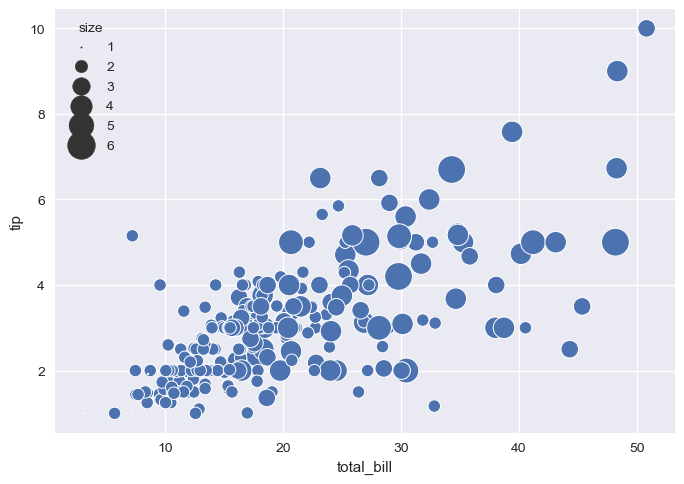

In [146]:
# size
sns.scatterplot(x='total_bill', y='tip', data=tips, size='size', sizes=(1,400));

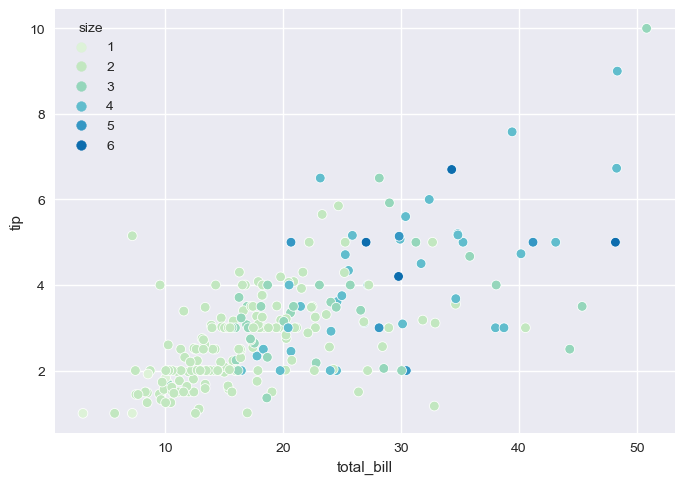

In [147]:
# color palette
# use GnBu_r to reverse color palette, GnBu_d for dark colors
# see Seaborn documentation for details on color palettes
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='size', palette=sns.color_palette('GnBu'));

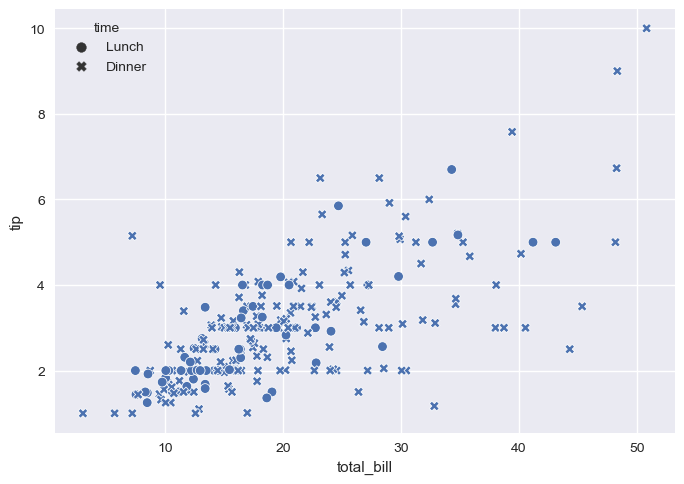

In [148]:
# style
sns.scatterplot(x='total_bill', y='tip', data=tips, style='time');

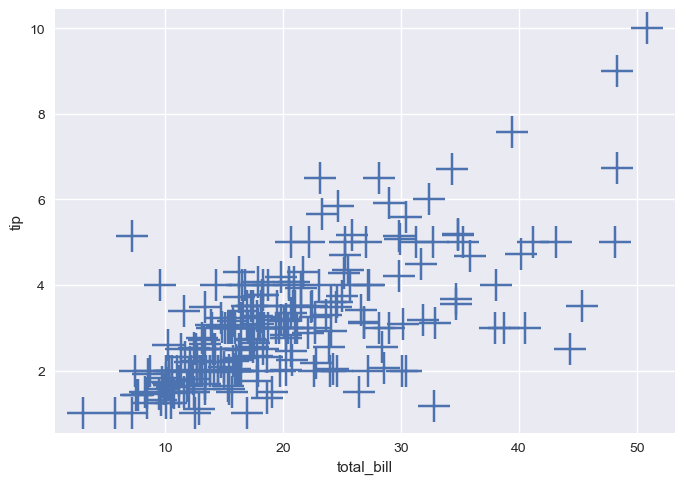

In [149]:
# use matplotlib arguments
# use different way to pass in data (using df column)
sns.scatterplot(x=tips.total_bill, y=tips.tip, s=500, marker='+');

### lineplot

Draw a line plot with possibility of several semantic groupings.

In [150]:
seattle_weather = db.tables.vega_seattle_weather.to_pandas()
seattle_weather.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun
1460,2015-12-31,0.00,5.60,-2.10,3.50,sun


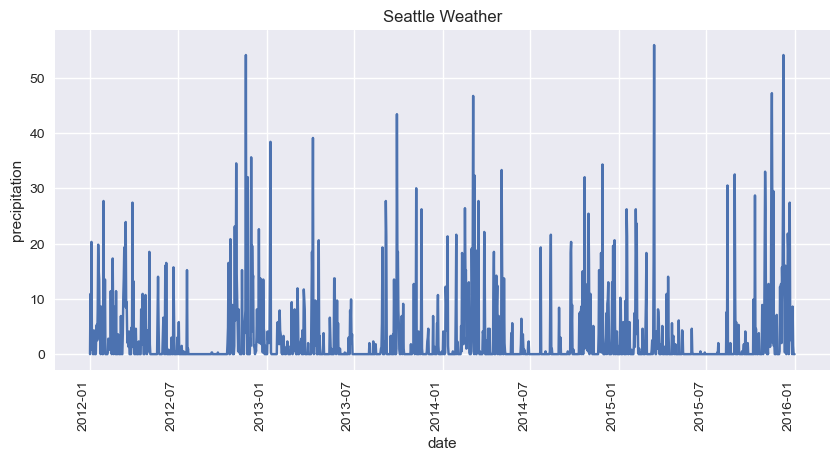

In [151]:
# seattle weather precipitation by date
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=seattle_weather.date, y=seattle_weather.precipitation, ax=ax)
ax.set_title('Seattle Weather')
fig.autofmt_xdate(rotation=90)

if error for fig.autofmt_xdate(rotation=90) use:

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [152]:
weather_aggregation = seattle_weather.set_index('date').resample('M').sum()
# weather_aggregation = seattle_weather.resample('M', on='date').sum()
weather_aggregation.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,173.30,218.70,47.80,120.90,drizzlerainrainrainrainrainrainsunrainrainsunsunsunsnowsnowsnowsnowsnowsnowsnowrainrainrainrainrainraindrizzlerainrainrainrain
2012-02-29,92.30,269.00,92.90,113.20,rainsunsunsunsunsunrainrainrainrainrainrainrainraindrizzlerainrainrainsunrainrainrainsunrainrainsnowsunsnowsnow
2012-03-31,183.00,296.20,88.00,131.70,sunrainsunrainrainsnowsunsunrainrainrainsnowsnowrainsnowrainsnowrainrainrainrainrainsunsunraindrizzlerainrainrainrainrain
2012-04-30,68.10,446.20,179.80,101.20,rainsunrainsunsnowrainsunsunsunrainrainraindrizzlesunrainrainrainrainrainrainsunrainsunrainrainrainraindrizzlerainrain
2012-05-31,52.20,547.50,253.90,104.00,rainrainrainrainsunsunsunsunrainsunsunsunsunsundrizzlesunrainrainsunrainrainrainrainrainrainsunsunrainsunrainrain


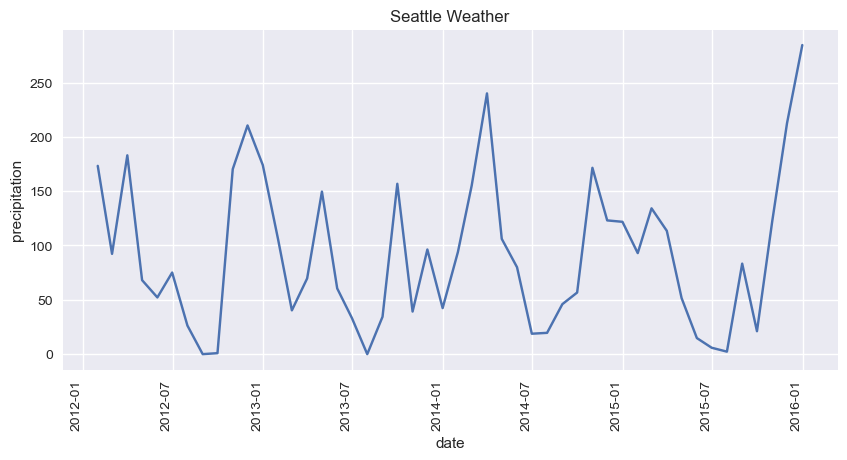

In [153]:
# seattle weather precipitation by month
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=weather_aggregation.index, y=weather_aggregation.precipitation, ax=ax)
ax.set_title('Seattle Weather')
fig.autofmt_xdate(rotation=90)

Pay special attention to the estimator and ci arguments.

Often, in Seaborn, the default is to show the data as an aggregate

**estimator:** name of pandas method or callable or None, default is mean

* Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn.
* examples - estimator=np.mean, estimator=np.median

**ci:** int or “sd” or None, default is 95
* Size of the confidence interval to draw when aggregating with an estimator. “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping.

Bootstrapping helps generate confidence intervals with repeated random sampling with replacement from the original sample.

A confidence interval is an estimated interval of numbers. It provides a range of values in which you can reasonably expect a value to fall.

In [154]:
sf_temps = db.tables.vega_sf_temps.to_pandas()
# remove time
sf_temps['date'] = pd.to_datetime(sf_temps['date'].dt.date)
sf_temps.tail()

,temp,date
8754,50.40,2010-12-31
8755,49.90,2010-12-31
8756,49.40,2010-12-31
8757,48.80,2010-12-31
8758,48.30,2010-12-31


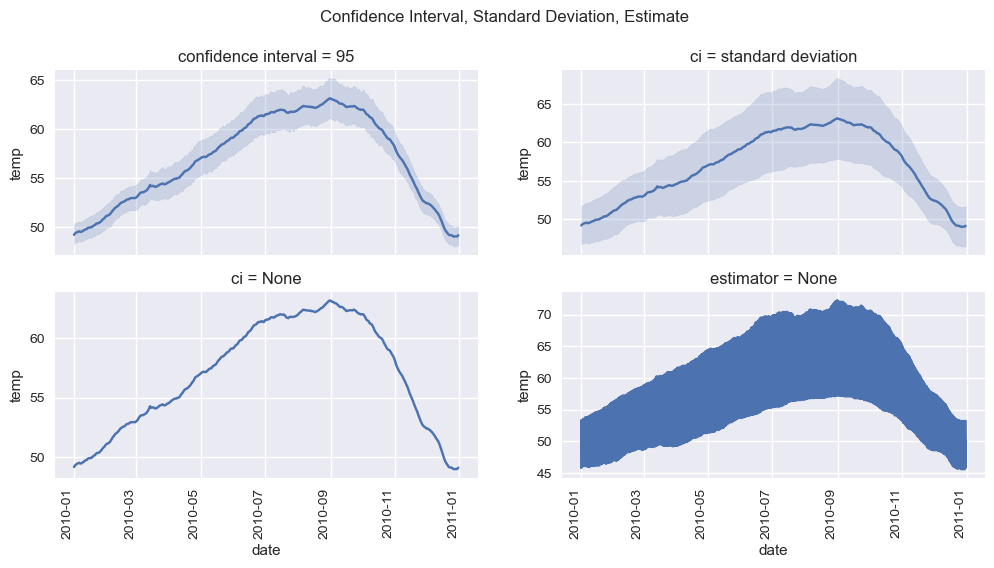

In [155]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Confidence Interval, Standard Deviation, Estimate')

# subplot(number_of_rows, number_of_columns, plot_number)
line1 = fig.add_subplot(2, 2, 1)
sns.lineplot(x=sf_temps.date, y=sf_temps.temp, ci=95, ax=line1).set_title('confidence interval = 95')

line2 = fig.add_subplot(2, 2, 2)
sns.lineplot(x=sf_temps.date, y=sf_temps.temp, ci='sd', ax=line2).set_title('ci = standard deviation')

line3 = fig.add_subplot(2, 2, 3)
sns.lineplot(x=sf_temps.date, y=sf_temps.temp, ci=None, ax=line3).set_title('ci = None')

# if estimator None, all observations will be drawn
line4 = fig.add_subplot(2, 2, 4)
sns.lineplot(x=sf_temps.date, y=sf_temps.temp, estimator=None, ax=line4).set_title('estimator = None')

fig.autofmt_xdate(rotation=90)

# err_style='bars' can also be used

In [156]:
# reaction times in a sleep deprivation study
# reaction is average reaction time (ms)
# days are number of days of sleep deprivation

sleepstudy = db.tables.pydata_sleepstudy.to_pandas()
sleepstudy.tail()

,Reaction,Days,Subject,__index_level_0__
175,329.61,5,372,176
176,334.48,6,372,177
177,343.22,7,372,178
178,369.14,8,372,179
179,364.12,9,372,180


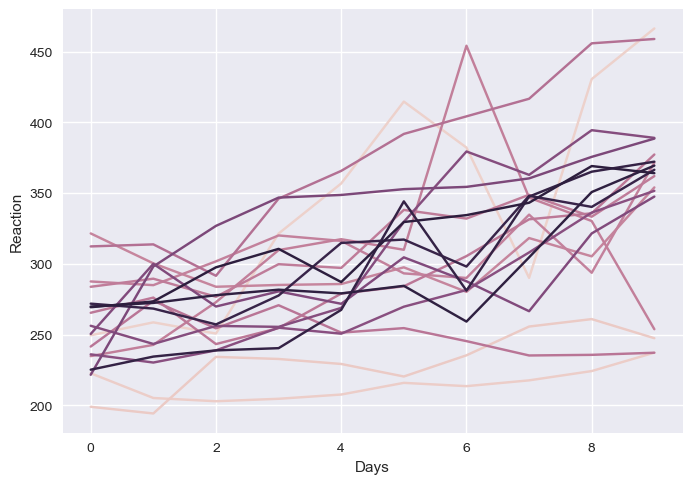

In [157]:
# using hue (color) to plot subjects as seprate lines instead of one line with ci
# sns.lineplot(x=sleepstudy.Days, y=sleepstudy.Reaction, legend=False);
sns.lineplot(x=sleepstudy.Days, y=sleepstudy.Reaction, hue=sleepstudy.Subject, legend=False);

In [158]:
date_range = pd.date_range(start='1-1-19', end='1-10-19')
df = pd.DataFrame({'Dates': date_range,
                   'A': [1,2,1,5,2,6,7,3,8,9],
                   'B': [4,5,8,3,6,8,1,2,3,1]})
df.head()

,Dates,A,B
0,2019-01-01,1,4
1,2019-01-02,2,5
2,2019-01-03,1,8
3,2019-01-04,5,3
4,2019-01-05,2,6


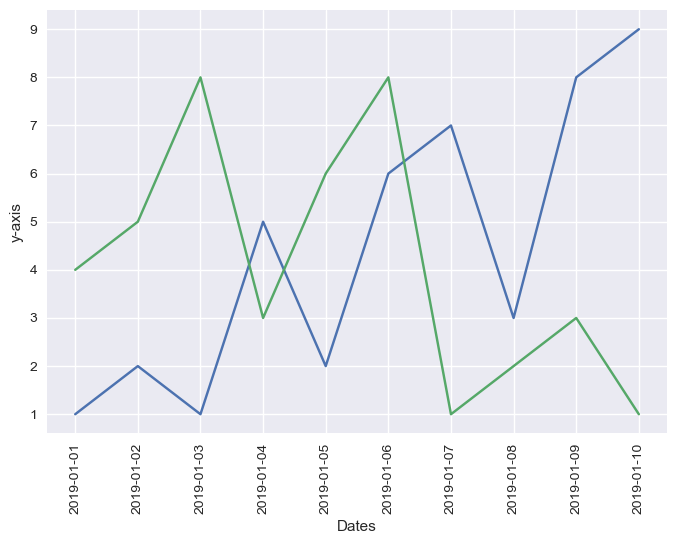

In [159]:
# plot multiple lines example
sns.lineplot(x=df.Dates, y=df.A)
sns.lineplot(x=df.Dates, y=df.B)
plt.ylabel('y-axis')
plt.xticks(rotation=90);

In [160]:
df_dates = df.set_index('Dates')
df_dates.head()

,A,B
Dates,,
2019-01-01,1,4
2019-01-02,2,5
2019-01-03,1,8
2019-01-04,5,3
2019-01-05,2,6


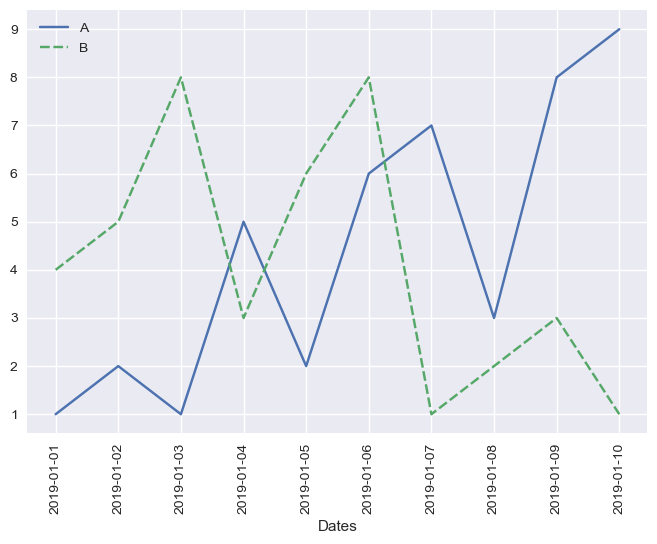

In [161]:
# plot multiple lines example (df dates as index)
sns.lineplot(data=df_dates)
plt.xticks(rotation=90);

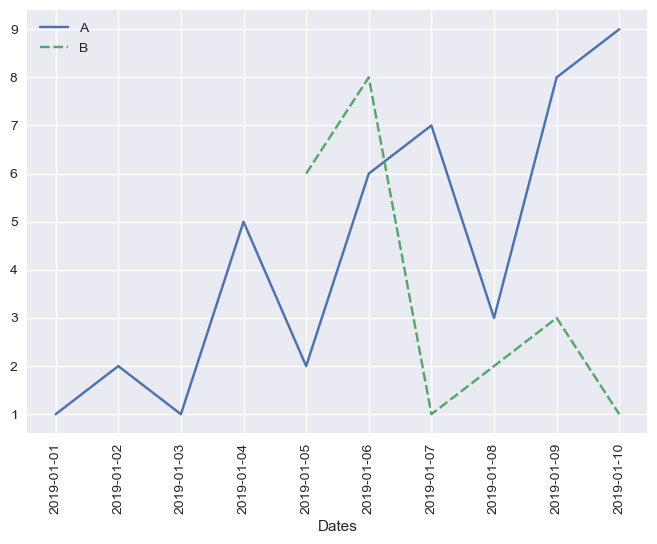

In [162]:
# show only parts of data on line plot
data = [df_dates.loc[:'1-10-19', 'A'], df_dates.loc['1-05-19':, 'B']]
sns.lineplot(data=data)
plt.xticks(rotation=90);

# Categorical Plots

## catplot

Figure-level interface for drawing categorical plots onto a FacetGrid.

kinds include: point, bar, count, strip, swarm, box, violin, boxen

Note, when using certain plots such as catplot, data must be passed using 'x', 'y', dataframe form like in this example.

In [163]:
# data
Arthritis = db.tables.pydata_Arthritis.to_pandas()
Arthritis.head()

,ID,Treatment,Sex,Age,Improved,__index_level_0__
0,57,Treated,Male,27,Some,1
1,46,Treated,Male,29,None,2
2,77,Treated,Male,30,None,3
3,17,Treated,Male,32,Marked,4
4,36,Treated,Male,46,Marked,5


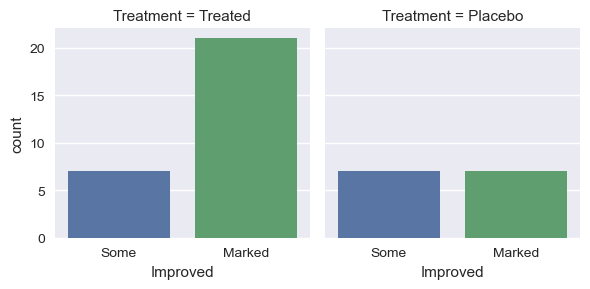

In [164]:
# add col and/or row arguments to split data in different ways and add detail
# col / row helps visualize data in different ways
sns.catplot(x='Improved',
            col='Treatment',
            height=3,
            data=Arthritis,
            kind='count');

## stripplot

Draw a scatterplot where one variable is categorical.

In [165]:
cars.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.00,4,140.00,86.00,2790,15.60,1982,USA
402,vw pickup,44.00,4,97.00,52.00,2130,24.60,1982,Europe
403,dodge rampage,32.00,4,135.00,84.00,2295,11.60,1982,USA
404,ford ranger,28.00,4,120.00,79.00,2625,18.60,1982,USA
405,chevy s-10,31.00,4,119.00,82.00,2720,19.40,1982,USA


The jitter argument offsets points so they don't overlap. This makes it easier to see the distribution. Default is True.

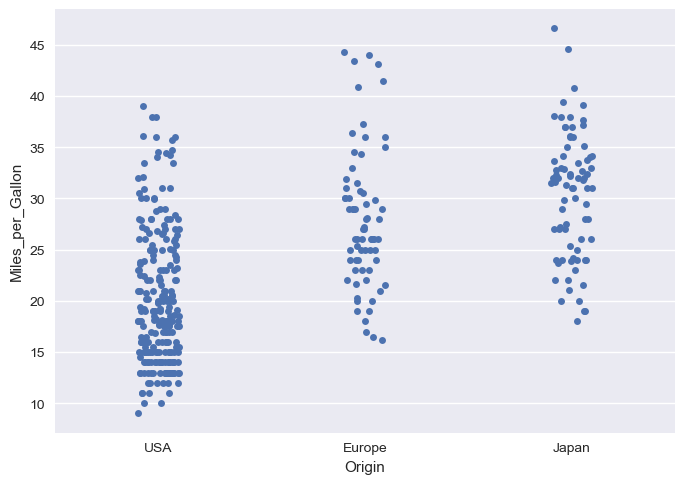

In [166]:
sns.stripplot(x='Origin', y='Miles_per_Gallon', data=cars, jitter=True);

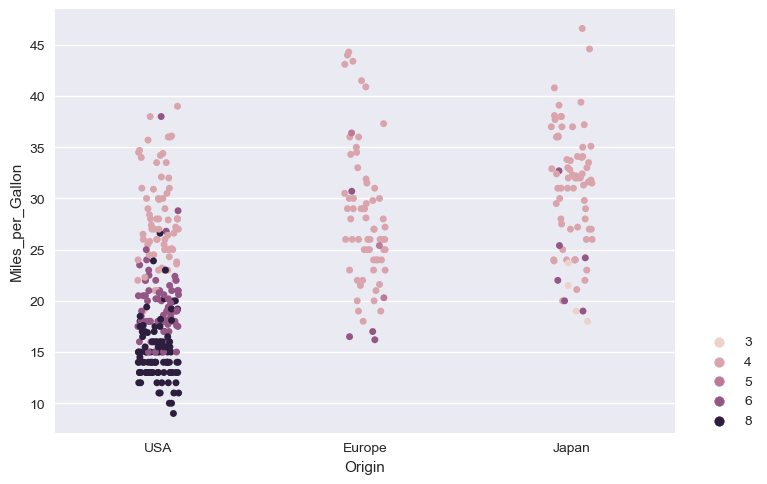

In [167]:
# view cylinders using hue (colors)
# dodge will separate the hue colors into their own clusters
sns.stripplot(x='Origin', y='Miles_per_Gallon', data=cars, hue='Cylinders', jitter=True, dodge=False);
# put legend outside plot
plt.legend(loc=(1.04,0));

## swarmplot

Draw a categorical scatterplot with non-overlapping points.

The swarmplot is similar to the stripplot but the points don’t overlap and can give a better representation of the distribution of values (sometimes called a beeswarm plot).

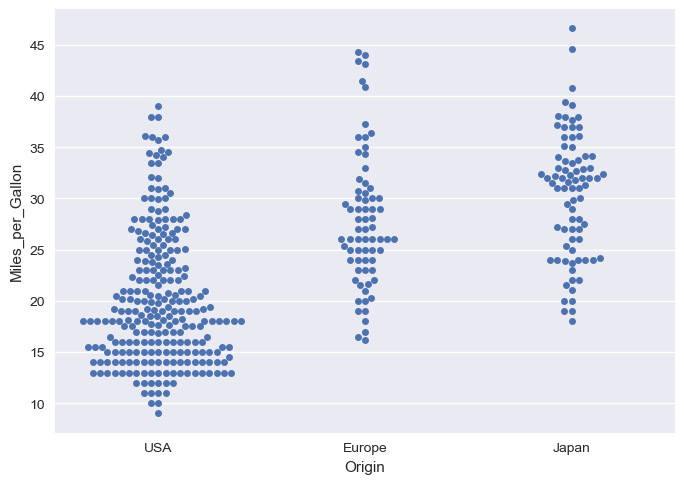

In [168]:
# use order=['Japan', 'USA', 'Europe'] to change order
# to rotate chart swap variables
sns.swarmplot(x='Origin', y='Miles_per_Gallon', data=cars);

## boxplot

Draw a box plot to show distributions with respect to categories.

shows minimum, maximum, median, first quartile (25th percentile), third quartile (75th percentile), and outliers

In [169]:
iris = db.tables.vega_iris.to_pandas()
iris.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,species
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica


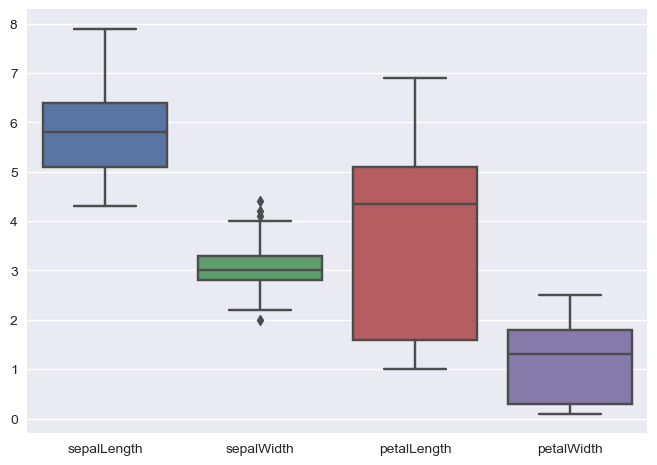

In [170]:
sns.boxplot(data=iris);

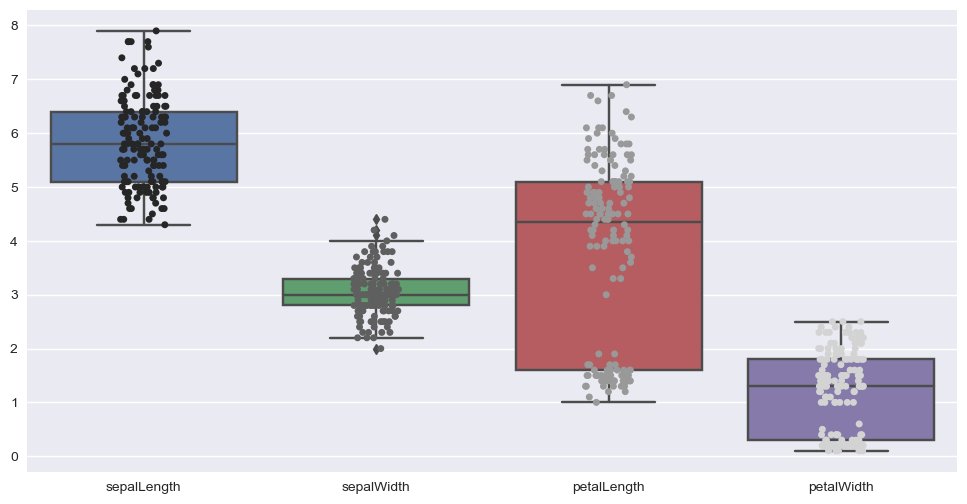

In [171]:
# use stripplot or swarmplot on top of boxplot to add an additional visualization element
plt.figure(figsize=(12,6))
sns.boxplot(data=iris);
sns.stripplot(data=iris, color='lightgrey');

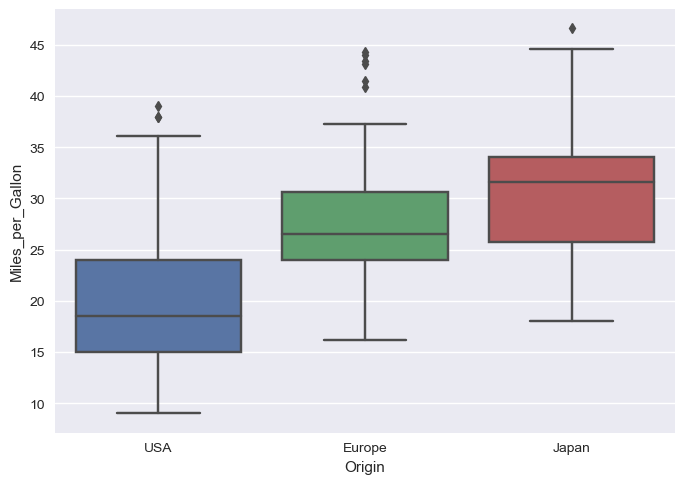

In [172]:
# another boxplot example
sns.boxplot(x='Origin', y='Miles_per_Gallon', data=cars);

## violinplot

Draw a combination of boxplot and kernel density estimate.

Kernel density estimates are related to histograms.

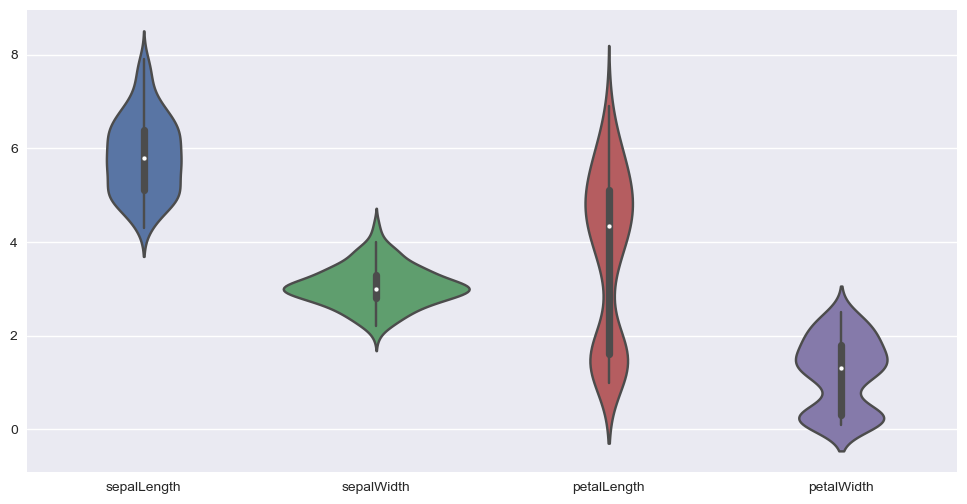

In [173]:
# use cut=0 to cut density plot to match box plot
# use inner argument to change representation of data
plt.figure(figsize=(12,6))
sns.violinplot(data=iris, cut=2);
# sns.swarmplot(data=iris, color='lightgray', alpha=0.8);

## boxenplot

Draw an enhanced box plot for larger datasets.

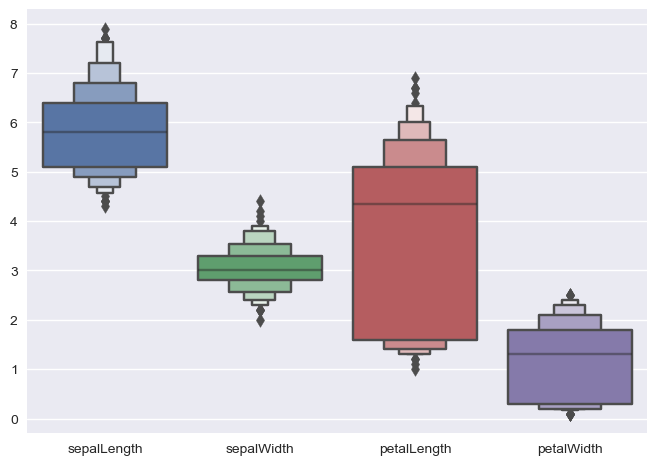

In [174]:
sns.boxenplot(data=iris);

## pointplot

Show point estimates and confidence intervals using scatter plot glyphs.

In [175]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


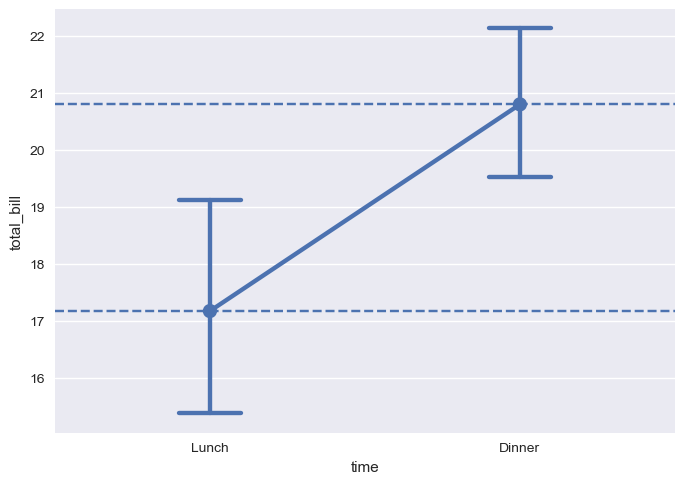

In [176]:
# compare average total bill for lunch vs dinner
# capped vertical bars are error bars
# ci argument can show confidence intervals, standard deviation, or ci=None for no error bars
# to use median instead of mean use estimator=np.median
sns.pointplot(x='time', y='total_bill', data=tips, capsize=0.2, estimator=np.mean);
# dotted lines for means
plt.axhline(tips[tips.time == 'Lunch']['total_bill'].mean(), linestyle='--');
plt.axhline(tips[tips.time == 'Dinner']['total_bill'].mean(), linestyle='--');

In [177]:
print('lunch - average total bill', tips[tips.time == 'Lunch']['total_bill'].mean())
print('dinner - average total bill', tips[tips.time == 'Dinner']['total_bill'].mean())

lunch - average total bill 17.168676470588235
dinner - average total bill 20.79715909090909


## barplot

Show point estimates and confidence intervals as rectangular bars.

In [178]:
sw_bar = db.tables.vega_seattle_weather.to_pandas()
sw_bar['year'] = sw_bar['date'].dt.year
sw_bar.tail()

,date,precipitation,temp_max,temp_min,wind,weather,year
1456,2015-12-27,8.60,4.40,1.70,2.90,fog,2015
1457,2015-12-28,1.50,5.00,1.70,1.30,fog,2015
1458,2015-12-29,0.00,7.20,0.60,2.60,fog,2015
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun,2015
1460,2015-12-31,0.00,5.60,-2.10,3.50,sun,2015


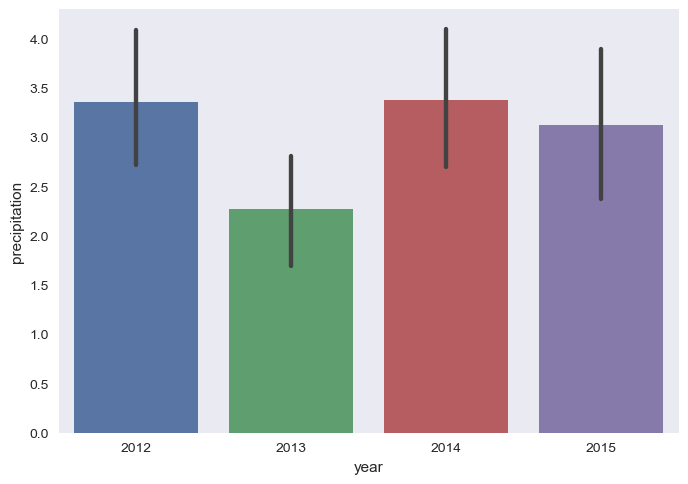

In [179]:
# ci=None for no error bars
# precipitation for many days is zero (median is 0)
sns.barplot(x='year', y='precipitation', data=sw_bar, estimator=np.mean);
plt.grid(axis='y')

In [180]:
print(sw_bar[sw_bar['year'] == 2012]['precipitation'].mean(),
      sw_bar[sw_bar['year'] == 2013]['precipitation'].mean(),
      sw_bar[sw_bar['year'] == 2014]['precipitation'].mean(),
      sw_bar[sw_bar['year'] == 2015]['precipitation'].mean())

3.349726775956284 2.2684931506849315 3.377534246575342 3.121095890410959


## countplot

Show the counts of observations in each categorical bin using bars.

In [181]:
# data
Arthritis.head()

,ID,Treatment,Sex,Age,Improved,__index_level_0__
0,57,Treated,Male,27,Some,1
1,46,Treated,Male,29,None,2
2,77,Treated,Male,30,None,3
3,17,Treated,Male,32,Marked,4
4,36,Treated,Male,46,Marked,5


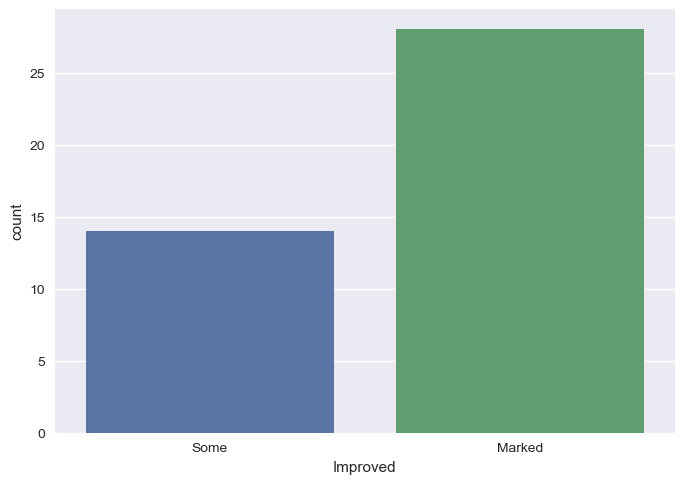

In [182]:
# count by levels of improvement
# swap x and y to rotate
sns.countplot(x='Improved', data=Arthritis);

# Distribution Plots

## distplot

Flexibly plot a univariate distribution of observations.

In [183]:
# measurements for black cherry trees
trees = db.tables.pydata_trees.to_pandas()
trees.head()

,Girth,Height,Volume,__index_level_0__
0,8.30,70,10.30,1
1,8.60,65,10.30,2
2,8.80,63,10.20,3
3,10.50,72,16.40,4
4,10.70,81,18.80,5


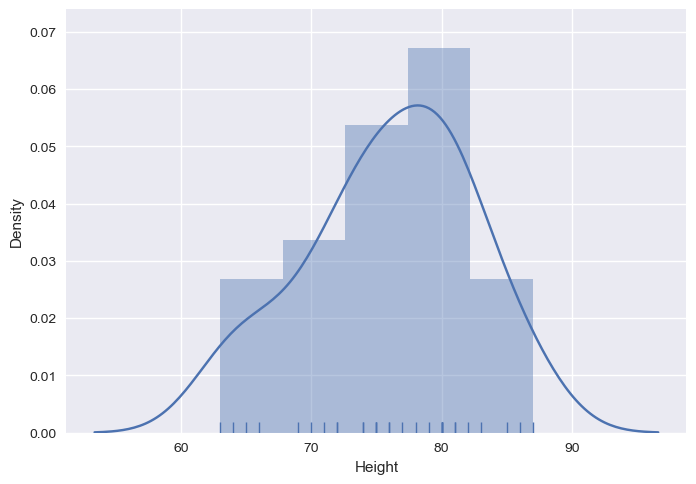

In [184]:
# kernel density estimate and histogram
# use rug to draw small vertical lines to show each observation in a distribution
# kde=False to show just histogram
sns.distplot(trees.Height, rug=True, kde=True);

## kdeplot

Fit and plot a univariate or bivariate kernel density estimate.

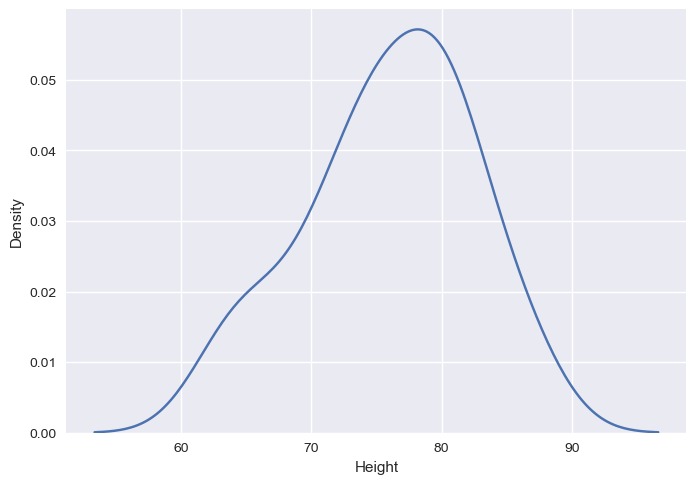

In [185]:
sns.kdeplot(trees.Height);

## rugplot

Plot datapoints in an array as sticks on an axis.

helps show additional information about how data is distributed

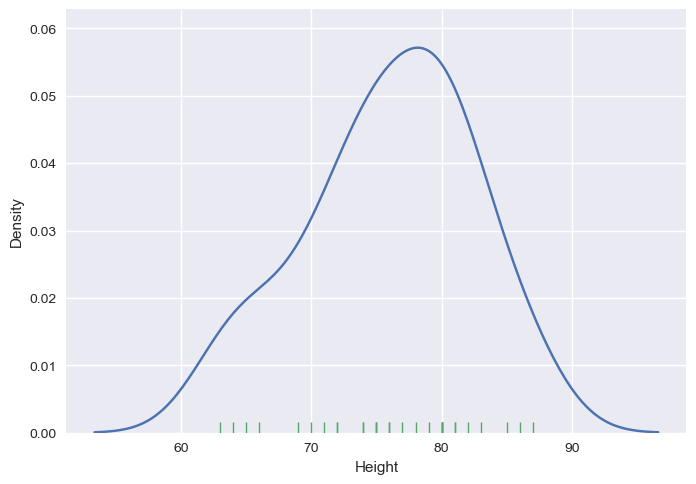

In [186]:
sns.kdeplot(trees.Height);
sns.rugplot(trees.Height);

# Regression Plots

## lmplot

Plot data and regression model fits across a FacetGrid.

In [187]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)

# data
Cars93 = db.tables.pydata_Cars93.to_pandas()
Cars93.tail()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,__index_level_0__
88,Volkswagen,Eurovan,Van,16.60,19.70,22.70,17,21,None,Front,5,2.50,109,4500,2915,Yes,21.10,7,187,115,72,38,34.00,NaN,3960,non-USA,Volkswagen Eurovan,89
89,Volkswagen,Passat,Compact,17.60,20.00,22.40,21,30,None,Front,4,2.00,134,5800,2685,Yes,18.50,5,180,103,67,35,31.50,14.00,2985,non-USA,Volkswagen Passat,90
90,Volkswagen,Corrado,Sporty,22.90,23.30,23.70,18,25,None,Front,6,2.80,178,5800,2385,Yes,18.50,4,159,97,66,36,26.00,15.00,2810,non-USA,Volkswagen Corrado,91
91,Volvo,240,Compact,21.80,22.70,23.50,21,28,Driver only,Rear,4,2.30,114,5400,2215,Yes,15.80,5,190,104,67,37,29.50,14.00,2985,non-USA,Volvo 240,92
92,Volvo,850,Midsize,24.80,26.70,28.50,20,28,Driver & Passenger,Front,5,2.40,168,6200,2310,Yes,19.30,5,184,105,69,38,30.00,15.00,3245,non-USA,Volvo 850,93


In [188]:
Cars93.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make', '__index_level_0__'],
      dtype='object')

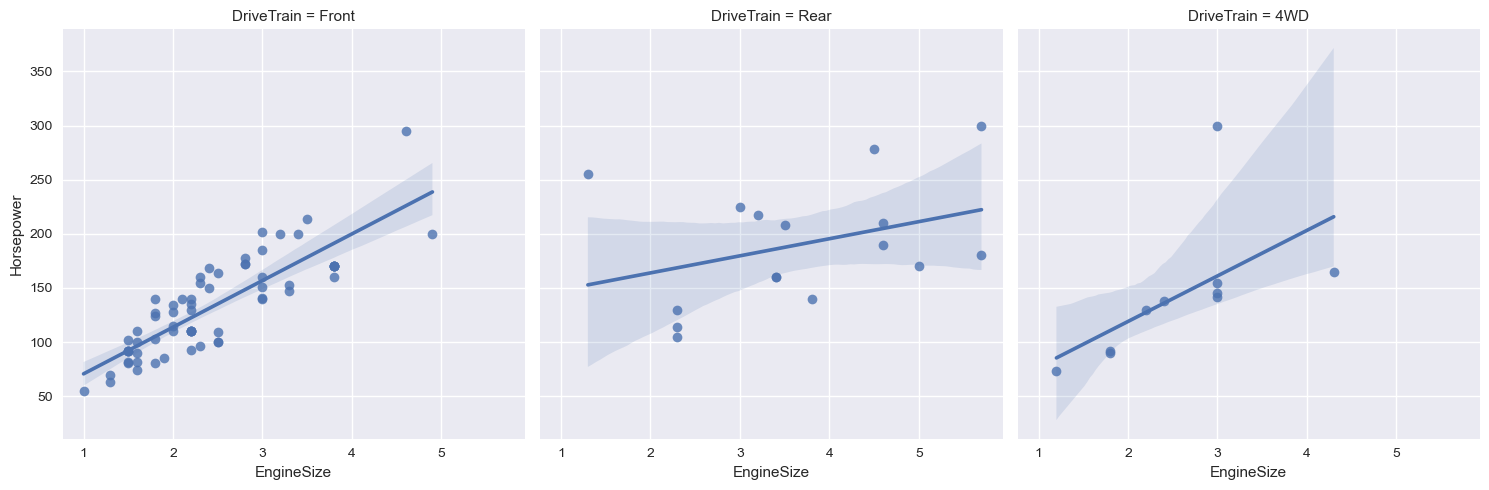

In [189]:
# add col and/or row arguments to split data in different ways and add detail
# col / row helps visualize data in different ways
sns.lmplot(x='EngineSize', 
           y='Horsepower',
           col='DriveTrain',
           height=5,
           data=Cars93);

## regplot

Plot data and a linear regression model fit.

In [190]:
# data for speed of cars and distances needed to stop (data from 1920s)
speed_distance = db.tables.pydata_cars.to_pandas()
speed_distance.head()

,speed,dist,__index_level_0__
0,4,2,1
1,4,10,2
2,7,4,3
3,7,22,4
4,8,16,5


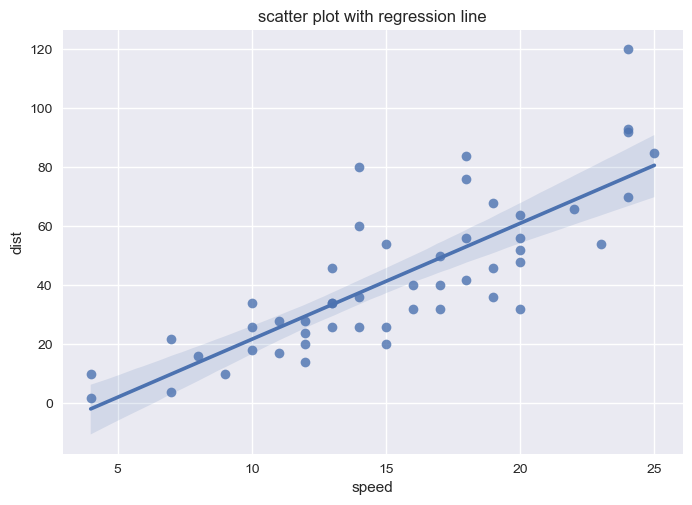

In [191]:
sns.regplot(x='speed', y='dist', data=speed_distance, ci=95);
# plt.ylim([0,125])
plt.title('scatter plot with regression line');

## residplot

Plot the residuals of a linear regression.

The residual is the difference between the predicted and the actual values. A residual plot can be a good way to examine a model and determine if changes need to be made.

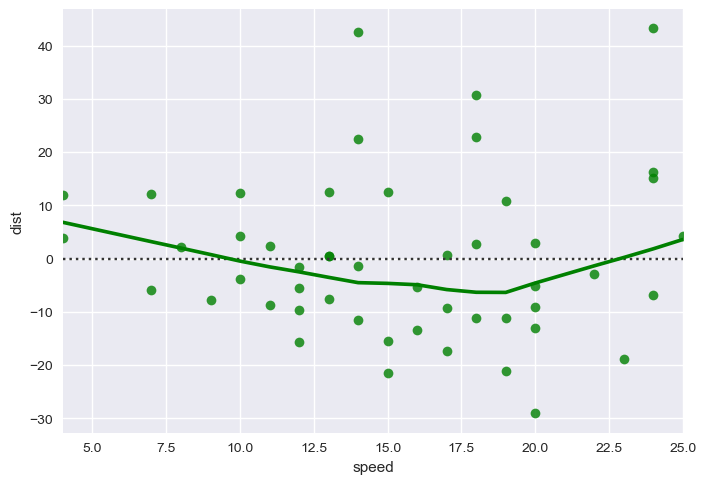

In [192]:
sns.residplot(x='speed', y='dist', data=speed_distance, lowess=True, color='g');

# Matrix Plots

## heatmap

Plot rectangular data as a color-encoded matrix.

In [197]:
cars_heatmap = cars.copy()
# drop year
cars_heatmap.drop(['Year','Name','Origin'], axis=1, inplace=True)
cars_heatmap.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,18.00,8,307.00,130.00,3504,12.00
1,15.00,8,350.00,165.00,3693,11.50
2,18.00,8,318.00,150.00,3436,11.00
3,16.00,8,304.00,150.00,3433,12.00
4,17.00,8,302.00,140.00,3449,10.50


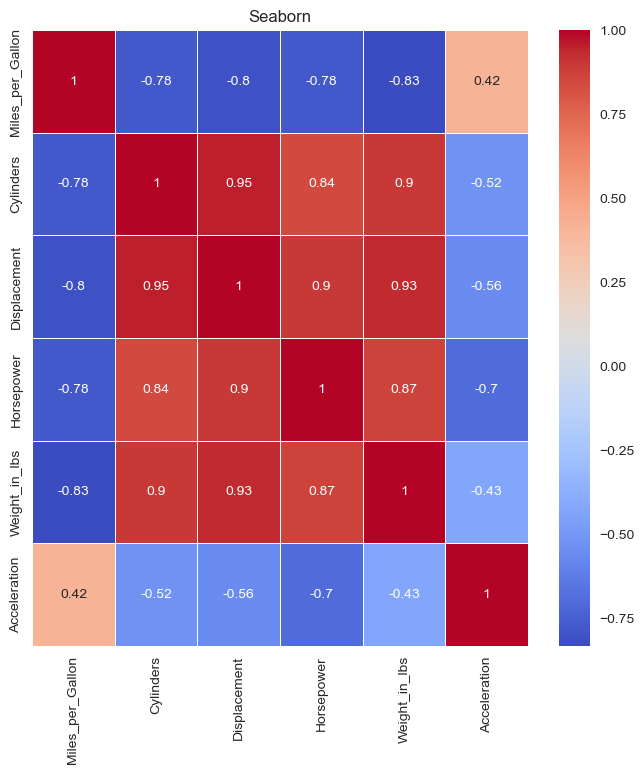

In [198]:
# correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(cars_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.5).set_title('Seaborn');

# if top and bottom cut off
# bottom, top = plt.ylim()
# plt.ylim(bottom + 0.5, top - 0.5);

In [199]:
sw_heatmap = db.tables.vega_seattle_weather.to_pandas()
sw_heatmap['year'] = sw_heatmap['date'].dt.year
sw_heatmap['month'] = sw_heatmap['date'].dt.month_name()
sw_heatmap.tail()

,date,precipitation,temp_max,temp_min,wind,weather,year,month
1456,2015-12-27,8.60,4.40,1.70,2.90,fog,2015,December
1457,2015-12-28,1.50,5.00,1.70,1.30,fog,2015,December
1458,2015-12-29,0.00,7.20,0.60,2.60,fog,2015,December
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun,2015,December
1460,2015-12-31,0.00,5.60,-2.10,3.50,sun,2015,December


In [200]:
sw = pd.pivot_table(sw_heatmap, 
                    index=['month'], 
                    columns=['year'], 
                    values='temp_max')
sw

year,2012,2013,2014,2015
month,,,,
April,14.87,14.24,15.46,15.50
August,25.86,26.12,26.38,26.09
December,7.24,7.02,10.14,8.38
February,9.28,9.47,8.20,12.52
January,7.05,6.11,9.60,10.15
July,22.91,26.09,26.90,28.09
June,18.69,23.25,21.59,26.06
March,9.55,12.71,12.91,14.38
May,17.66,19.63,19.87,20.03


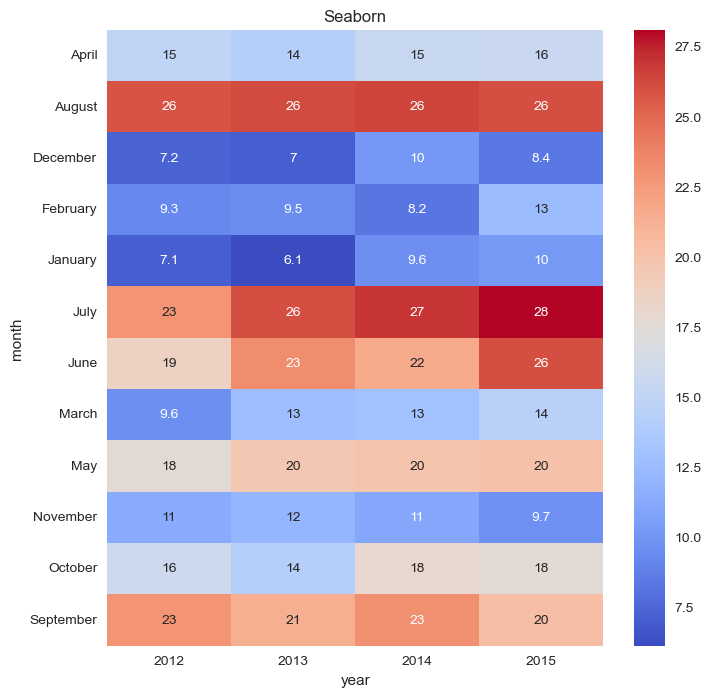

In [201]:
# heatmap
# color related to temperature
plt.figure(figsize=(8,8))
sns.heatmap(sw, annot=True, cmap='coolwarm').set_title('Seaborn');

# if top and bottom cut off
# bottom, top = plt.ylim()
# plt.ylim(bottom + 0.5, top - 0.5);

## clustermap

Plot a matrix dataset as a hierarchically-clustered heatmap.

A clustermap is a combination of a heatmap and a dendrogram. A dendrogram is a tree-shaped graph that clusters more similar variables under the same branches.

<Figure size 200x600 with 0 Axes>

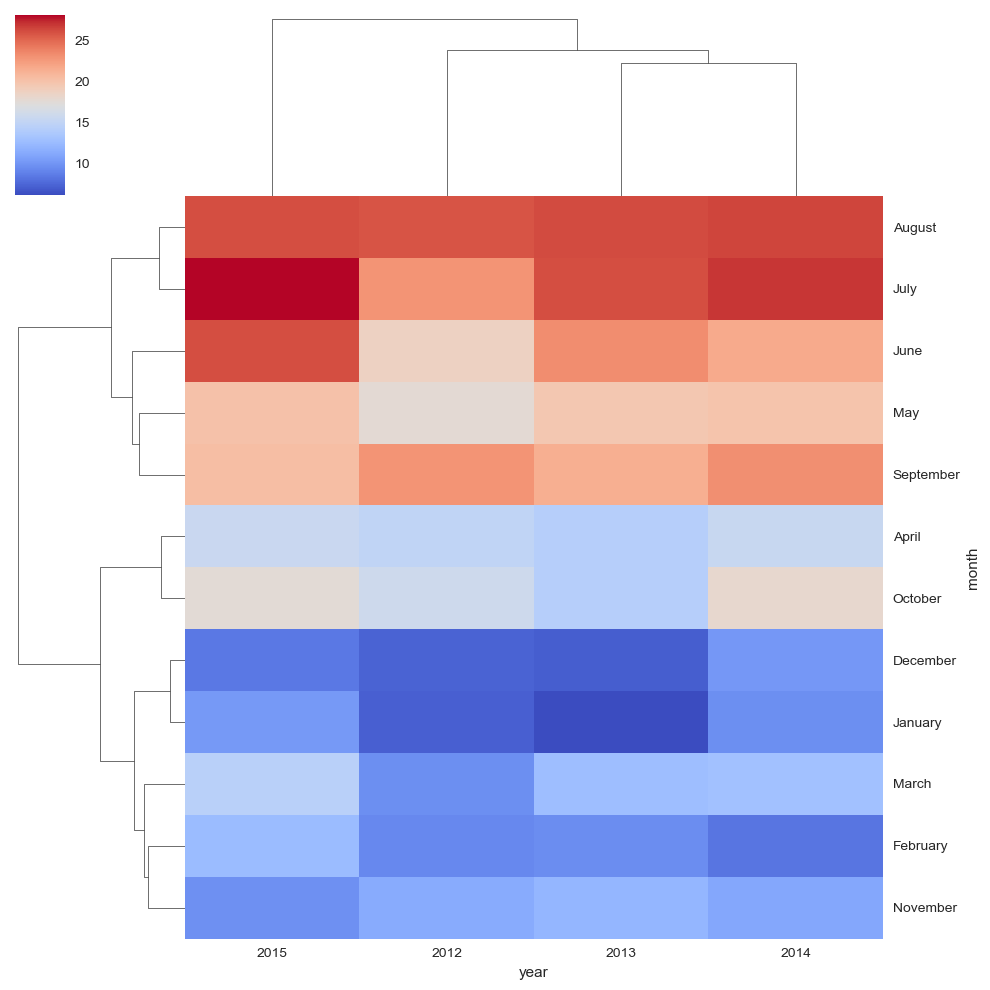

In [202]:
# correlation heatmap
plt.figure(figsize=(2,6));
sns.clustermap(sw, cmap='coolwarm');

# Multi-Plot Grids

### Facet Grids

**FacetGrid**

Multi-plot grid for plotting conditional relationships.

**FacetGrid.map**

Apply a plotting function to each facet’s subset of the data.

**FacetGrid.map_dataframe**

Like .map but passes args as strings and inserts data in kwargs.

In [203]:
exercise = sns.load_dataset('exercise')
# drop first column
exercise.drop(exercise.columns[0], axis=1, inplace=True)
exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


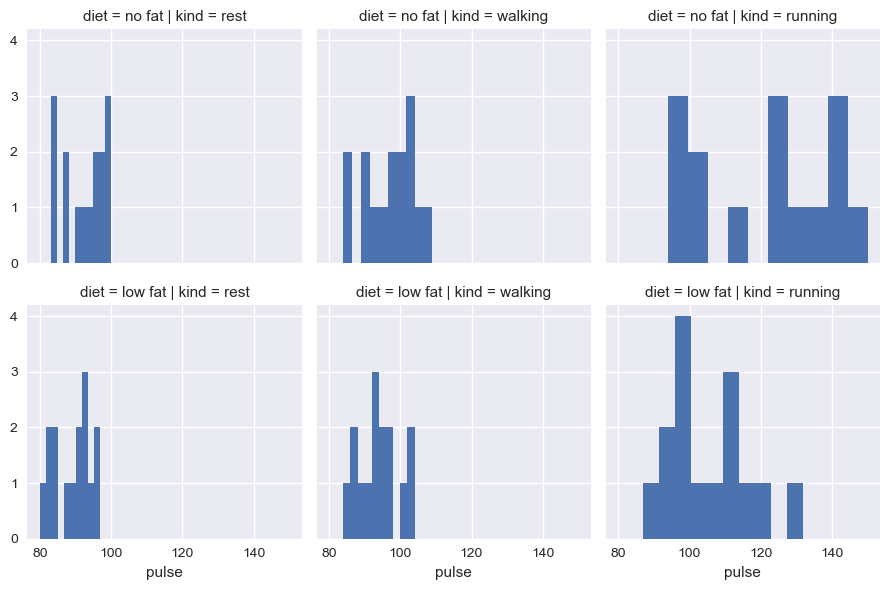

In [204]:
sns.FacetGrid(exercise, col='kind',  row='diet').map(plt.hist, 'pulse');
# sns.FacetGrid(exercise, col='kind',  row='diet').map(sns.kdeplot, 'pulse');

### Pair Grids

## pairplot

Plot pairwise relationships in a dataset.

In [206]:
cars_pairplot = db.tables.vega_cars.to_pandas()
# drop year
cars_pairplot.drop(['Year'], axis=1, inplace=True)
cars_pairplot.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Origin
401,ford mustang gl,27.00,4,140.00,86.00,2790,15.60,USA
402,vw pickup,44.00,4,97.00,52.00,2130,24.60,Europe
403,dodge rampage,32.00,4,135.00,84.00,2295,11.60,USA
404,ford ranger,28.00,4,120.00,79.00,2625,18.60,USA
405,chevy s-10,31.00,4,119.00,82.00,2720,19.40,USA


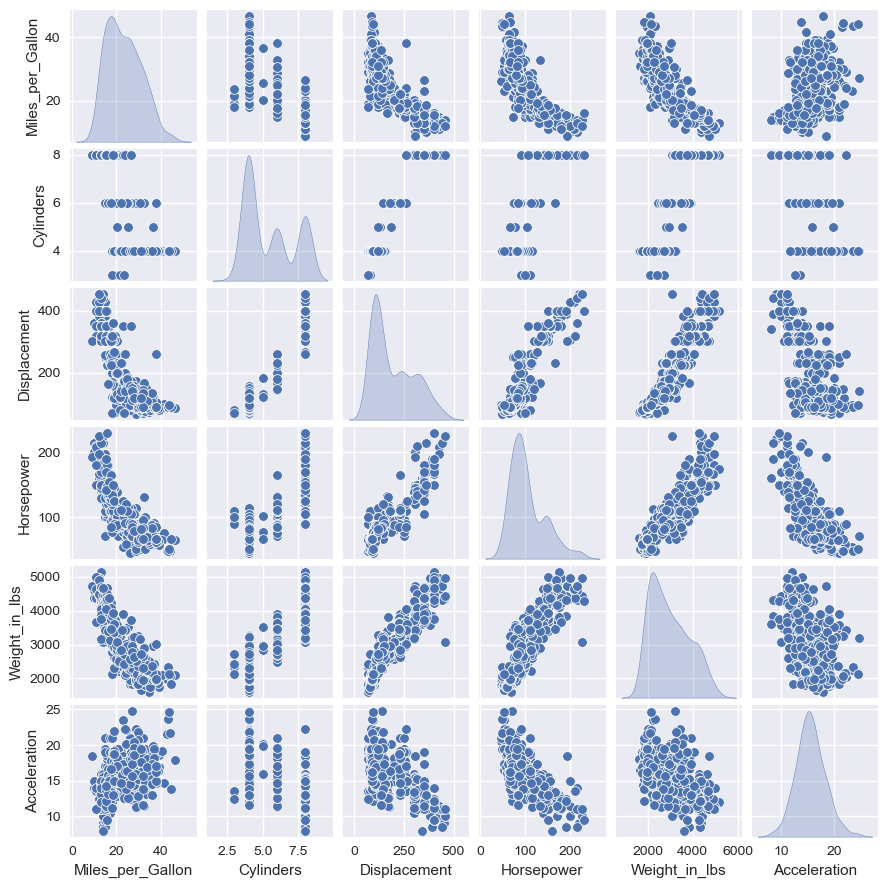

In [207]:
# quick way to show relationships between data elements
# kind and diag_kind arguments can be changed to change plot types
# kind='reg' to fit linear regression model
sns.pairplot(cars_pairplot.dropna(), diag_kind='kde', height=1.5);

## PairGrid

Subplot grid for plotting pairwise relationships in a dataset.

#### PairGrid.map

Plot with the same function in every subplot.

In [209]:
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


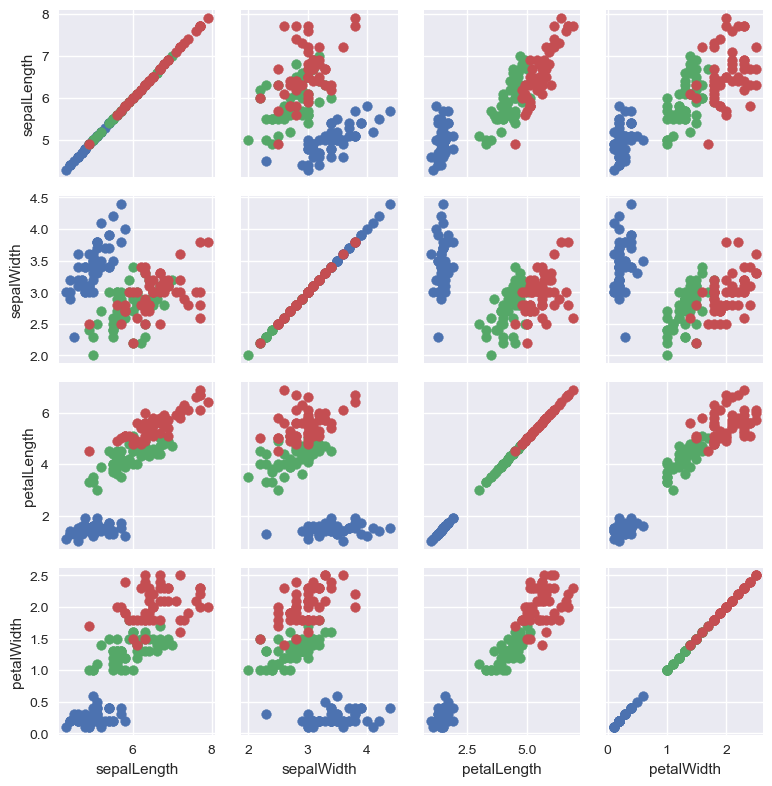

In [210]:
sns.PairGrid(iris, height=2, hue='species').map(plt.scatter);

#### PairGrid.map_diag

Plot with a univariate function on each diagonal subplot.

#### PairGrid.map_offdiag

Plot with a bivariate function on the off-diagonal subplots.

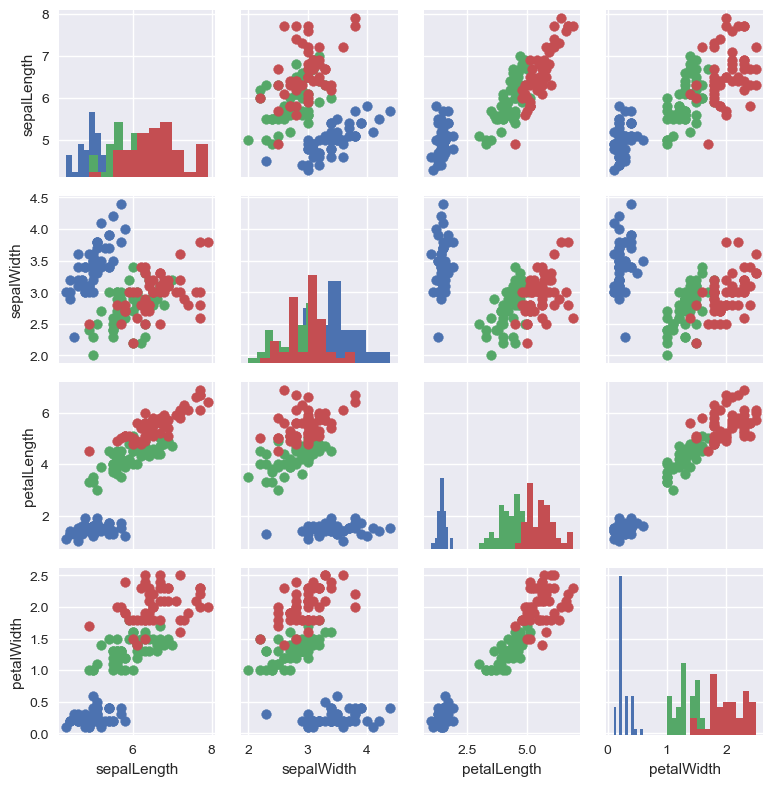

In [211]:
pair_grid = sns.PairGrid(iris, height=2, hue='species')
pair_grid.map_diag(plt.hist);
pair_grid.map_offdiag(plt.scatter);

#### PairGrid.map_lower

Plot with a bivariate function on the lower diagonal subplots.

#### PairGrid.map_upper

Plot with a bivariate function on the upper diagonal subplots.

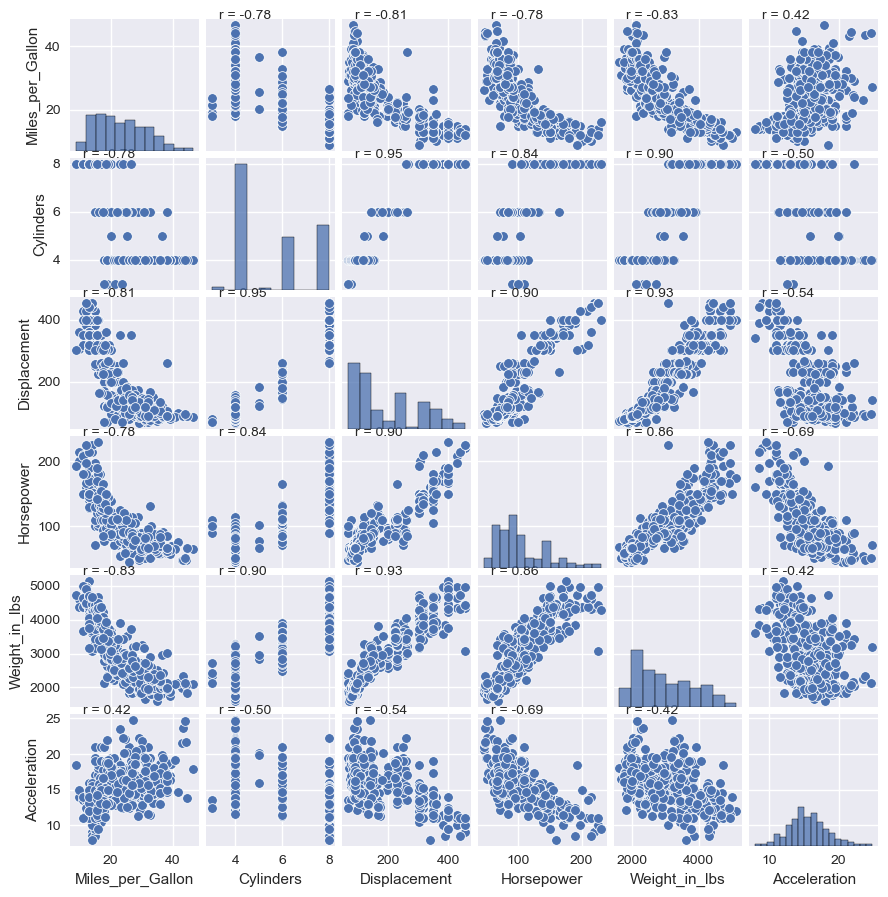

In [212]:
# add correlation coefficient to plot
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)

pair_plot = sns.pairplot(cars_pairplot.dropna(), height=1.5);
pair_plot.map_lower(corrfunc);
pair_plot.map_upper(corrfunc);

In [213]:
cars_pairplot.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Origin'],
      dtype='object')

## Joint Grids

### jointplot

Draw a plot of two variables with bivariate and univariate graphs.

In [214]:
# sales prices of houses in the city of Windsor from 1987
Housing = db.tables.pydata_Housing.to_pandas()
Housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,__index_level_0__
0,"42,000.00",5850,3,1,2,yes,no,yes,no,no,1,no,1
1,"38,500.00",4000,2,1,1,yes,no,no,no,no,0,no,2
2,"49,500.00",3060,3,1,1,yes,no,no,no,no,0,no,3
3,"60,500.00",6650,3,1,2,yes,yes,no,no,no,0,no,4
4,"61,000.00",6360,2,1,1,yes,no,no,no,no,0,no,5


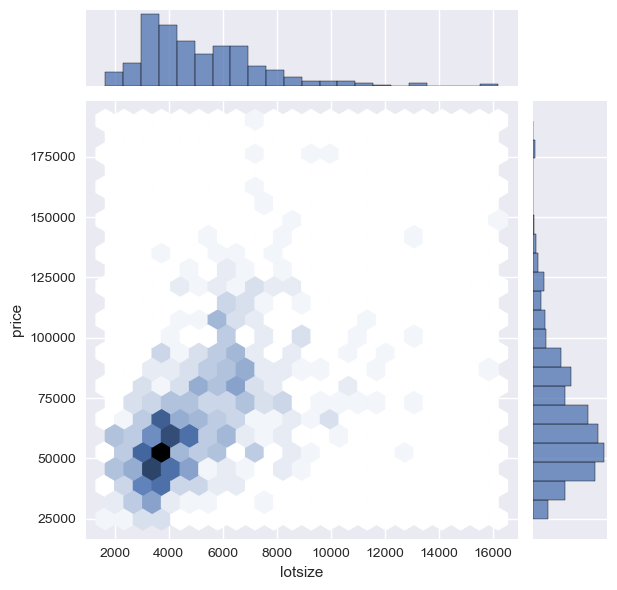

In [215]:
# hexbin jointplot
# hexbin plots can be a good replacement for scatterplots when the scatterplot points overlap too much
# show relationship between lotsize and price using hexbin
# show distributions of data using histogram and rugplot
sns.jointplot(x=Housing.lotsize, y=Housing.price, kind='hex', marginal_kws=dict(rug=True));

# another example
# sns.jointplot(x=Housing.lotsize, y=Housing.price, kind='resid');

### JointGrid

Grid for drawing a bivariate plot with marginal univariate plots.

Similar to jointplot with more flexibility.

**JointGrid.plot**

Shortcut to draw the full plot.

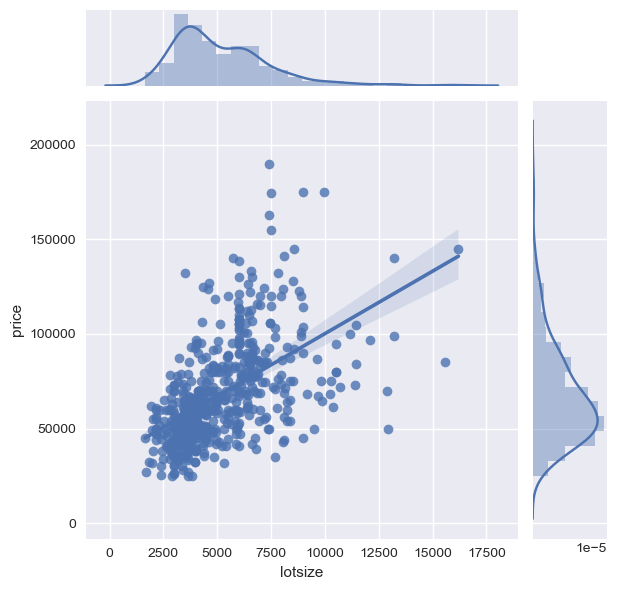

In [216]:
sns.JointGrid(x='lotsize', y='price', data=Housing).plot(sns.regplot, sns.distplot);

**JointGrid.plot_joint**

Draw a bivariate plot of x and y.

**JointGrid.plot_marginals**

Draw univariate plots for x and y separately.

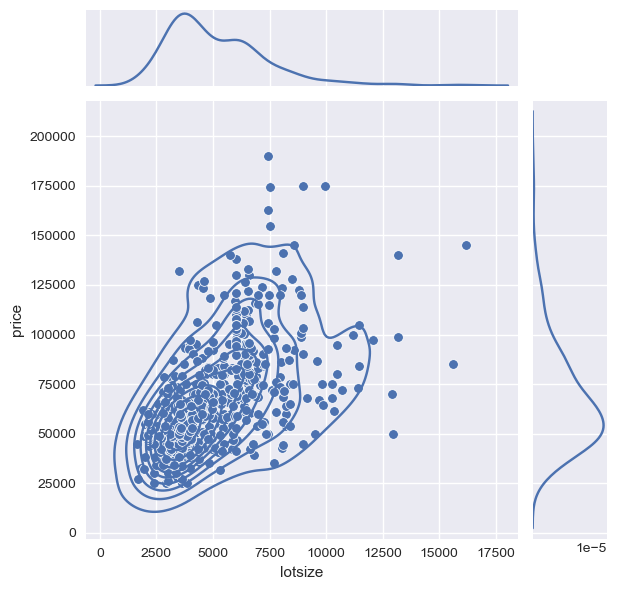

In [217]:
joint_grid = sns.JointGrid(x='lotsize', y='price', data=Housing)
joint_grid = joint_grid.plot_joint(sns.scatterplot)
joint_grid = joint_grid.plot_joint(sns.kdeplot)
joint_grid = joint_grid.plot_marginals(sns.kdeplot)